In [ ]:
from imutils import paths
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def dhash(image, hashSize=8):
	# convert the image to grayscale and resize the grayscale image,
	# adding a single column (width) so we can compute the horizontal
	# gradient
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	resized = cv2.resize(gray, (hashSize + 1, hashSize))
	# compute the (relative) horizontal gradient between adjacent
	# column pixels
	diff = resized[:, 1:] > resized[:, :-1]
	# convert the difference image to a hash and return it
	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [ ]:
remove = 1
dataset = "/content/drive/My Drive/Coding/detect_duplicate_dataset/dataset"

[INFO] computing image hashes...
/content/drive/My Drive/Coding/detect_duplicate_dataset/dataset/00000023.jpg


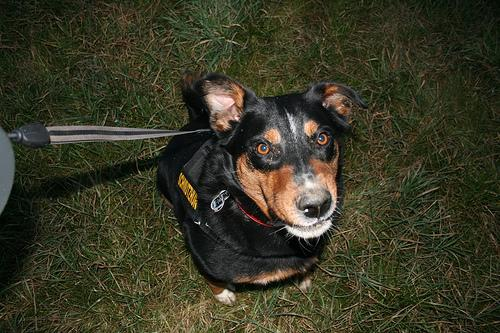

In [ ]:
# grab the paths to all images in our input dataset directory and
# then initialize our hashes dictionary
print("[INFO] computing image hashes...")
imagePaths = list(paths.list_images(dataset))
hashes = {}

imagepath = imagePaths[0]
print(imagepath)
img = cv2.imread(imagepath)
cv2_imshow(img)
# loop over our image paths

for imagePath in imagePaths:
	# load the input image and compute the hash
	image = cv2.imread(imagePath)
	h = dhash(image)

	# grab all image paths with that hash, add the current image
	# path to it, and store the list back in the hashes dictionary
	p = hashes.get(h, [])
	p.append(imagePath)
	hashes[h] = p

In [ ]:
print(len(hashes))

for (h, hashedPaths) in hashes.items():
  # check to see if there is more than one image with the same hash
	if len(hashedPaths) > 1:
		# check to see if this is a dry run
		if remove <= 0:
			# initialize a montage to store all images with the same
			# hash
			montage = None

			# loop over all image paths with the same hash
			for p in hashedPaths:
				# load the input image and resize it to a fixed width
				# and height
				image = cv2.imread(p)
				image = cv2.resize(image, (150, 150))

				# if our montage is None, initialize it
				if montage is None:
					montage = image

				# otherwise, horizontally stack the images
				else:
					montage = np.hstack([montage, image])

			# show the montage for the hash
			print("[INFO] hash: {}".format(h))
			cv2_imshow(montage)
			cv2.waitKey(0)

		# otherwise, we'll be removing the duplicate images
		else:
			# loop over all image paths with the same hash *except*
			# for the first image in the list (since we want to keep
			# one, and only one, of the duplicate images)
			for p in hashedPaths[1:]:
				os.remove(p)


993


In [ ]:
imagePaths = list(paths.list_images(dataset))
print(len(imagePaths))

993


In [ ]:
drive.flush_and_unmount()